Attention block consists of _Query_ (Q), _key_ (K), _Value_ (V). Q represents what a word is looking for, K represents what each other word offers, and their similarity determines the attention score, and V contains the actual information to be extracted, with higher attention scores leading to more significant contributions from its corresponding Value. 
$$softmax(\frac{Q K^T}{\sqrt{d}})V$$

Step 0, Loss 1.0105
Step 100, Loss 0.0454
Step 200, Loss 0.0313
Step 300, Loss 0.0318
Step 400, Loss 0.0257


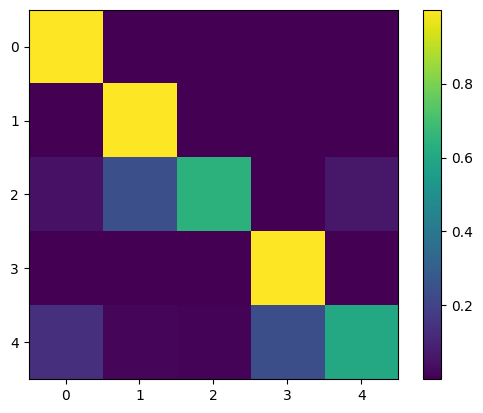

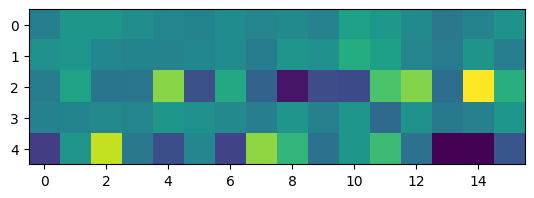

In [45]:
import torch
import torch.nn as nn
import torch.optim as optim

# Hyperparameters
seq_len = 5
embed_dim = 16
num_heads = 2
batch_size = 32
steps = 500

# Define a simple model: just multihead attention + linear projection back to embedding size
class IdentityAttentionModel(nn.Module):
    def __init__(self, embed_dim, num_heads):
        super().__init__()
        self.mha = nn.MultiheadAttention(embed_dim, num_heads, batch_first=True)
        # self.fc = nn.Linear(embed_dim, embed_dim)  # optional projection

    def forward(self, x):
        out, attn_weights = self.mha(x, x, x)  # self-attention
        # out = self.fc(out)
        return out, attn_weights

model = IdentityAttentionModel(embed_dim, num_heads)
opt = optim.Adam(model.parameters(), lr=1e-2)
loss_fn = nn.MSELoss()

# Training loop
for step in range(steps):
    # Random input sequence
    x = torch.randn(batch_size, seq_len, embed_dim)

    # Target is the input itself (identity mapping)
    target = x

    # Forward
    pred, attn_weights = model(x)

    # Compute loss
    loss = loss_fn(pred, target)

    # Backprop
    opt.zero_grad()
    loss.backward()
    opt.step()

    if step % 100 == 0:
        print(f"Step {step}, Loss {loss.item():.4f}")

# Test on one example
x_test = torch.randn(1, seq_len, embed_dim)
pred, attn_weights = model(x_test)
# print("\nInput:\n", x_test[0].detach().numpy())
# print("\nPrediction:\n", pred[0].detach().numpy())
# print("\nAttention Weights (last layer):\n", attn_weights[0].detach().numpy())

import matplotlib.pyplot as plt
plt.imshow(attn_weights[0].detach().numpy())
plt.colorbar()
plt.show()

plt.imshow(x_test[0].detach().numpy() - pred[0].detach().numpy())

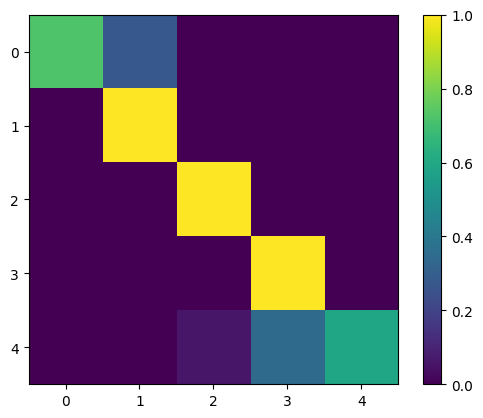